Questions:

???????????????????????????????????

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('full_data.csv', engine= 'python')
df.head()
max(df['phenocluster'])

23

In [42]:
from pandas.api.types import is_numeric_dtype

for c in df.columns[1:]:
    if not is_numeric_dtype(df[c]):
        #print(c)
        df[c] = df[c].apply(lambda x: float(x.split()[0].replace(',','.')))

ValueError: could not convert string to float: 'Stroma'

In [47]:
dfn = df._get_numeric_data()
normalized_df=(dfn-dfn.mean())/dfn.std()
normalized_df.head()

,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,...,noise_Mean,phenocluster,index.x,index.y,Slide,Patient,cx,cy,nx,ny
0,-0.826798,0.540902,1.024646,-1.210643,-0.543700,-0.749640,-1.111395,-1.120603,-1.240271,-1.243359,...,-0.269650,1.754623,0.331639,0.331639,0.60563,0.476771,0.114260,-0.130533,0.115972,-0.129103
1,-0.826596,-1.125167,-0.889237,-1.208242,-0.508413,-0.810904,-0.929994,-1.126718,-1.214758,-1.289593,...,1.552482,1.754623,0.331639,0.331639,0.60563,0.476771,-0.193018,-0.125039,-0.195324,-0.123506
2,-0.826393,-0.041219,-0.506461,-1.209043,-0.559370,-0.848500,-1.409939,-1.120446,-1.233119,-1.236333,...,-0.360345,1.754623,0.331639,0.331639,0.60563,0.476771,-1.259409,-0.127013,-1.257866,-0.126249
3,-0.826191,0.079220,-0.171531,-1.209696,-0.424720,-0.747432,-0.804960,-1.147415,-1.240369,-1.243185,...,-0.247221,-0.609149,0.331639,0.331639,0.60563,0.476771,-0.940437,-0.120786,-0.944076,-0.125625
4,-0.825989,-1.004728,-0.745696,-1.210844,-0.590978,-0.918089,-0.817997,-1.165338,-1.265487,-1.246136,...,-0.360345,1.754623,0.331639,0.331639,0.60563,0.476771,-0.755973,-0.126576,-0.753238,-0.126407


In [106]:
mask = df['ImageNumber'] == '20210808_MBAA047_S8_R-2_D-S8_T42_R4'
df1 = normalized_df[mask]
df1.head()

,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,X132Xe_Mean,...,noise_Mean,phenocluster,index.x,index.y,Slide,Patient,cx,cy,nx,ny
335423,-0.826798,-1.386117,-0.937084,-1.397043,0.991195,0.885831,-1.040891,-1.368193,-1.371195,-1.334043,...,-0.360345,-0.427321,-0.14373,-0.14373,-0.019551,-0.024494,0.379301,3.304549,0.379142,3.304634
335424,-0.826596,-1.345971,-1.319861,-1.393908,0.847272,0.527960,-2.091577,-1.290035,-1.371538,-1.386832,...,-0.360345,0.118165,-0.14373,-0.14373,-0.019551,-0.024494,-1.134147,3.299159,-1.133382,3.298632
335425,-0.826393,-0.502900,-0.506461,-1.391478,0.616863,0.597647,-1.065141,-1.323911,-1.356021,-1.384355,...,-0.360345,1.754623,-0.14373,-0.14373,-0.019551,-0.024494,2.915905,3.294030,2.914486,3.294092
335426,-0.826191,-0.964582,-0.937084,-1.389735,-0.590978,-0.531761,-1.018813,-1.335929,-1.382344,-1.341635,...,-0.360345,-0.972807,-0.14373,-0.14373,-0.019551,-0.024494,2.706870,3.291810,2.705922,3.293610
335427,-0.825989,-0.362388,-0.123684,-1.393912,0.407270,0.580884,-0.898187,-1.329248,-1.376512,-1.376478,...,-0.360345,0.118165,-0.14373,-0.14373,-0.019551,-0.024494,3.154915,3.289636,3.155360,3.291895


In [45]:
df['ImageNumber'].value_counts()

20210808_MBAA047_S8_R-2_D-S8_T42_R4       29966
20210805_MBAA047_S1_R-1_D-S1_T2_R1,2,3    14016
20210731_MBAA047_S3_R-1_D-S3_T17_R1,2     13958
20210802_MBAA047_S2_R-2_D-S2_T14_R1       13921
20210801_MBAA047_S5_R-3_D-S5_T23_R1       11392
                                          ...  
20210728_MBAA47_S10_R-7_D-S10_T50_R4       1409
20210805_MBAA047_S7_R-3_D-S7_T35_R3        1313
20210730_MBAA047_S15_R-5_D-S15_T113_R2     1277
20210802_MBAA047_S9_R-2_D-S9_T47_R2        1144
20210802_MBAA047_S9_R-3_D-S9_T47_R3         752
Name: ImageNumber, Length: 86, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

labels = np.array(df[['cx','cy']])
prefeatures = df.drop(['cx','cy', 'nx', 'ny'], axis=1)
features = np.array(prefeatures._get_numeric_data())
print(prefeatures._get_numeric_data().shape)
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size = 0.25)

(3630, 60)


In [9]:
df.head()

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,phenocluster,index.x,index.y,Slide,Patient,Status.simple,cx,cy,nx,ny
0,20200731_MBAA047_S11_R-4_D-S11_T59_R1,1,232,122,5.947691,0.012886,0.351471,0.496079,2.248913,2.969381,...,19,59,59,11,5,Dysplastic,587.344828,527.500000,588.008197,528.024590
1,20200731_MBAA047_S11_R-4_D-S11_T59_R1,2,66,42,5.952402,0.022504,0.284320,0.553487,2.244265,2.994011,...,19,59,59,11,5,Dysplastic,478.590909,529.742424,477.833333,530.309524
2,20200731_MBAA047_S11_R-4_D-S11_T59_R1,3,174,58,5.950830,0.008615,0.243112,0.401600,2.249032,2.976285,...,19,59,59,11,5,Dysplastic,101.166667,528.936782,101.775862,529.189655
3,20200731_MBAA047_S11_R-4_D-S11_T59_R1,4,186,72,5.949549,0.045315,0.353891,0.593056,2.228531,2.969286,...,6,59,59,11,5,Dysplastic,214.059140,531.478495,212.833333,529.444444
4,20200731_MBAA047_S11_R-4_D-S11_T59_R1,5,78,48,5.947296,0.000000,0.166837,0.588930,2.214907,2.945038,...,19,59,59,11,5,Dysplastic,279.346154,529.115385,280.375000,529.125000


In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

mlp = MLPRegressor(hidden_layer_sizes = (70,),activation = 'relu',max_iter=3000)
mlp.fit(X_train,y_train)
print(mlp.score(X_test, y_test)) 

C:\Users\Jan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.4008613784194827


In [107]:
from sklearn_som.som import SOM
col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
#col = ["Nucl_Area","GATA3_Nucl_Mean","Tbet_Nucl_Mean","FOXP3_Nucl_Mean","NFkB_Nucl_Mean","Ki67_Nucl_Mean","H3_Nucl_Mean","Ir193_Nucl_Mean", "nx", "ny"]
df2 = df1[col]
iris_som = SOM(m=3, n=3, dim=54)
iris_som.fit(np.array(df2),epochs=1000)

In [108]:
predictions = iris_som.predict(np.array(df2))

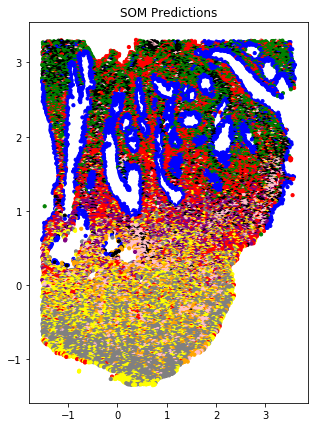

In [109]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df1['cx']
y = df1['cy']
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'black', 'gray', 'orange', 'pink']

ax.scatter(x, y, c=predictions, cmap=ListedColormap(colors), s=10)
ax.title.set_text('SOM Predictions')

plt.show()

In [105]:
iris_som.cluster_centers_

array([[[-5.25928326e-01, -1.85586865e-01, -2.84463857e-01,
         -1.21201897e+00, -3.90507805e-01, -5.06222390e-01,
         -1.18638175e+00, -1.12516253e+00, -1.24337237e+00,
         -1.25195150e+00, -8.16889575e-01, -9.25207632e-01,
          4.46053929e-01, -7.51373111e-01, -5.22906780e-01,
          7.31285449e-02,  2.20262321e-01, -4.90826473e-02,
         -8.87729628e-01, -5.04325752e-01, -1.31807454e-01,
         -7.41061571e-01,  8.78014446e-01,  1.25301163e-01,
         -9.51251637e-01, -1.53208638e-01,  1.88398557e-01,
          2.37737184e-01, -3.34188401e-01, -6.98845419e-01,
          6.53990100e-01, -6.89536794e-01, -4.35684604e-01,
          4.13141755e-01,  9.06511704e-01,  1.17273156e+00,
         -1.27645455e-01, -1.83572913e-01, -9.45928293e-01,
         -8.66594581e-01,  6.45955999e-02, -3.76540948e-01,
         -3.58691806e-01, -2.06122657e-01,  3.18371543e-01,
         -2.01738941e-01, -6.08938305e-01, -9.95063996e-01,
         -1.03613087e+00, -9.72776950e-0